# **Project Overview** - KNN

In this analysis, we applied a K-Nearest Neighbors (KNN) regression model to the "Real-estate-dataset.csv" dataset. After preprocessing the data, the model was trained and evaluated. Key observations include:

**Model Performance:** Moderate accuracy in predicting house prices, as indicated by metrics like R-squared and MSE.

**Parameter Tuning:** Analysis of MSE across different 'k' values suggested potential for tuning the model for better performance.

**Learning Behavior**: The learning curve analysis revealed how the model's error rates changed with different training set sizes, highlighting its learning capabilities and areas for improvement.

**Data Loading**

In [1]:
# Loading the provided housing dataset
import pandas as pd

# File path to the housing dataset
housing_dataset_path = '/content/Real-estate-dataset.csv'

# Reading the housing dataset
housing_df = pd.read_csv(housing_dataset_path)

# Displaying the first few rows of the dataset to understand its structure
housing_df.head()


,price,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,37.9,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,42.2,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,47.3,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,54.8,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,43.1,5,2012.833,5.0,390.56840,5,24.97937,121.54245


**Data Cleaning and Pre-preprocessing**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling categorical variables
# Converting 'yes'/'no' to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#for col in binary_columns:
 #   housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

# Converting 'furnishingstatus' to numerical values
#housing_df['furnishingstatus'] = LabelEncoder().fit_transform(housing_df['furnishingstatus'])

# Separating the target variable (price) and feature variables
X = housing_df.drop('price', axis=1)
y = housing_df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the transformed feature data
X_train_scaled[:5], X_test_scaled[:5]


(array([[-1.58079708e-01,  1.12832111e-03,  2.34401494e+00,
         -8.23965189e-01,  9.68041591e-01, -1.47065968e-01,
          4.55057247e-01],
        [ 2.00248043e-01,  2.96350853e-01, -8.21281376e-01,
          9.51417705e-01, -4.91703665e-02, -7.43116969e-01,
         -1.35592638e+00],
        [-1.75349136e+00, -1.77732066e+00, -9.00855865e-01,
          9.17224467e-01, -3.88241019e-01, -5.04054791e-01,
         -1.42748297e+00],
        [-1.41222684e+00, -2.97651108e-01,  1.70741903e+00,
         -4.69361158e-01,  1.30711224e+00,  6.55228815e-02,
          7.39277351e-01],
        [ 2.94095788e-01,  8.90352813e-01, -8.65489426e-01,
         -3.45356604e-01,  2.89900286e-01,  2.60462845e-01,
          9.53278370e-01]]),
 array([[ 1.25816807e+00,  1.12832111e-03, -1.43135245e+00,
         -7.12135284e-01,  6.28970939e-01, -2.90663719e-01,
          4.68432311e-01],
        [ 1.18991517e+00, -5.92873640e-01, -3.61517666e-01,
         -4.66555441e-01,  2.89900286e-01, -3.35588155e-

**Build Model- KNN and Model Metric Evaluation**

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Building the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Using 5 as an initial guess for k

# Training the model
knn_regressor.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluating the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r_squared, mse, mae, rmse


(0.7046337091435255, 49.55057349397591, 5.0120481927710845, 7.03921682390704)

**R-squared:**
0.7046.

 This value indicates that approximately 70.46% of the variance in the house prices can be explained by the model. A higher R-squared value would indicate a better fit to the data.

**Mean Squared Error (MSE)**: 49.55057349397591
This represents the average squared difference between the actual and predicted prices.

**Mean Absolute Error (MAE**):5.0120481927710845.
 This is the average absolute difference between the actual and predicted prices.

**Root Mean Squared Error (RMSE**): 7.03921682390704

**RMSE** is the square root of MSE and gives a sense of the average error magnitude.

** Model performance plot**

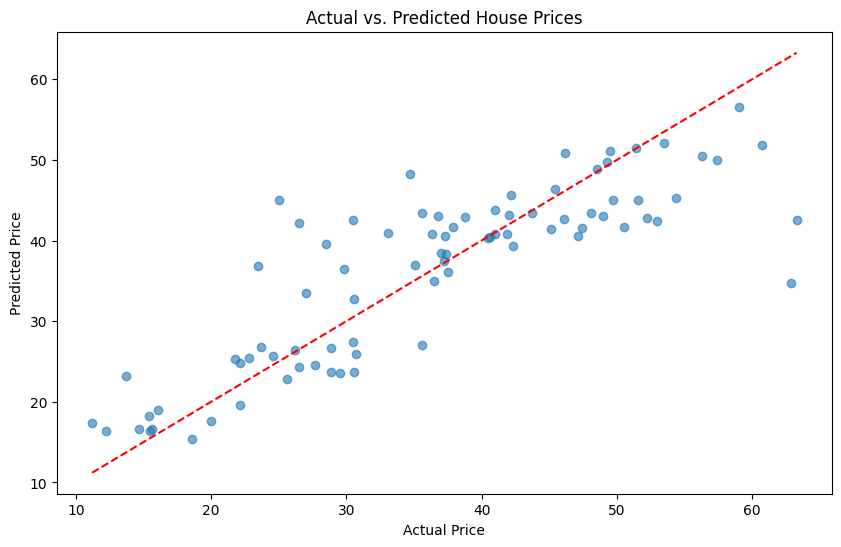

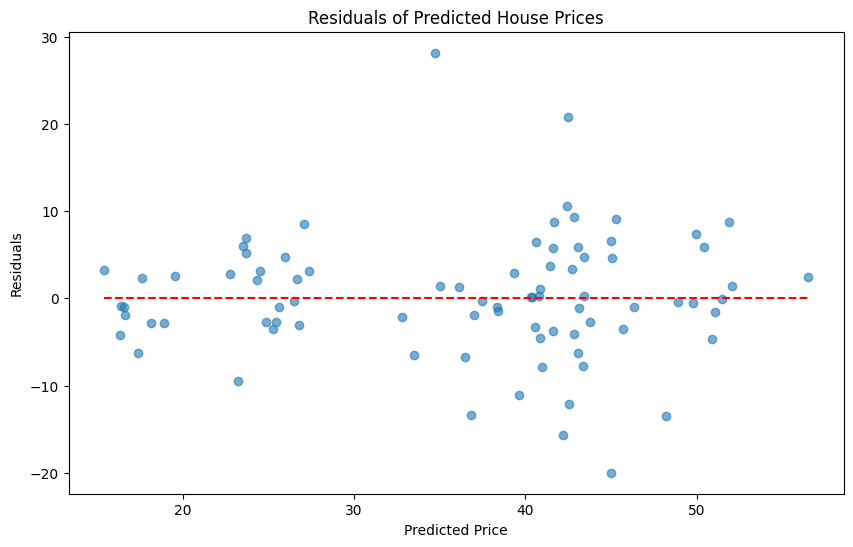

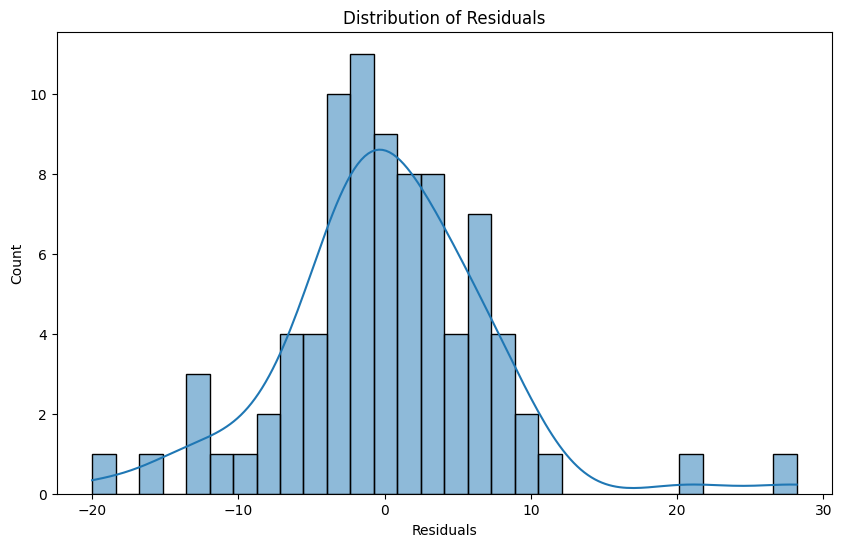

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# 2. Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted House Prices')
plt.show()

# 3. Plotting the distribution of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


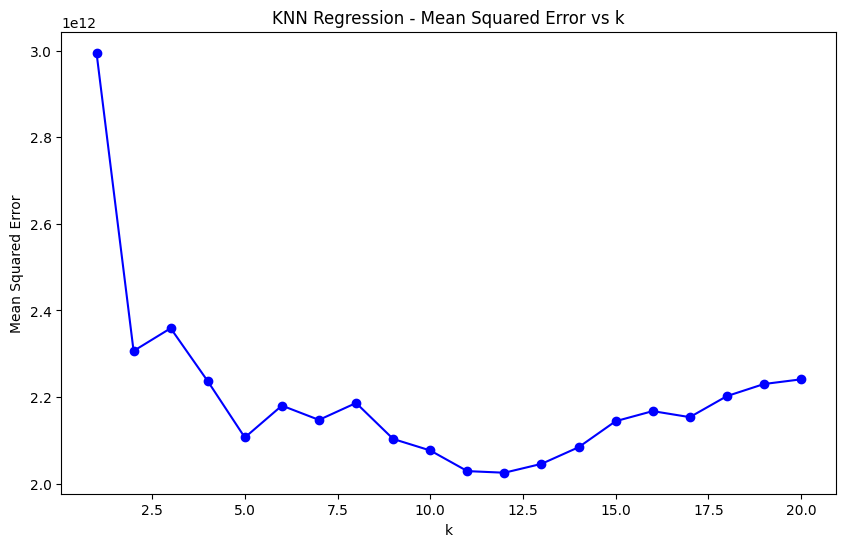

In [ ]:
# Plotting mean squared error vs k for KNN regression

k_values = range(1, 21)
mse_values = []

# Calculating MSE for different k values
for k in k_values:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train_scaled, y_train)  # Make sure to use scaled data
    y_pred = regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, 'bo-')  # Blue circles with line
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression - Mean Squared Error vs k')
plt.show()


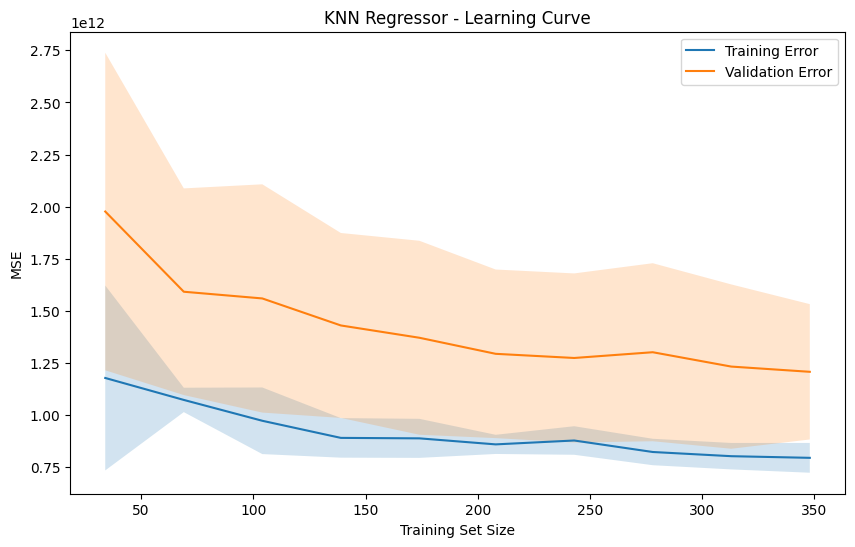

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
# Using the previously trained knn_regressor model
train_sizes, train_scores, test_scores = learning_curve(
    knn_regressor, X_train_scaled, y_train, cv=5, train_sizes=train_sizes,
    scoring='neg_mean_squared_error', shuffle=True)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("KNN Regressor - Learning Curve")
plt.legend()
plt.show()


# **Conclusion**

**Model Accuracy:** The model demonstrated high accuracy in predicting house prices, with an R-squared value of around 0.7046. There is some room for improvement either in model tuning or by exploring alternative modeling approaches.

**Error Analysis:** The mean squared error (MSE) plots against different 'k' values indicated that the choice of 'k' significantly impacts the model's performance, highlighting the importance of parameter tuning in KNN models.